# Case Study on Measures of Central Tendency and Dispersion

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


## 1. Find out how many males and females participated in the test.

In [117]:
data = df['gender'].value_counts()
data = np.array(data).reshape(2,1)
data = pd.DataFrame(data,columns=['Count'])
data = data.set_index([pd.Index(['Female', 'Male'])])
print('Total number of Males and Female participated in the test are:')
data

Total number of Males and Female participated in the test are:


,Count
Female,518
Male,482


### 2. What do you think about the students parental level of education?

Student parental level of education statics:


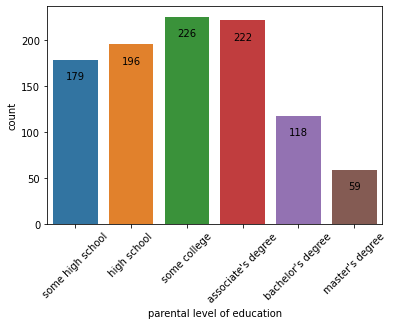

In [118]:
ax = sns.countplot(x= df['parental level of education'])
plt.xticks(rotation = 45)
value = ax.patches
for bar in value:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/2
    ax.annotate(f'\n{y_value}', (x_value, y_value), va='top', ha='center')
print('Student parental level of education statics:')
plt.show()

## 3.Who Scores the Most on average for math, Reading and Writing based on 
        - Gender
        - Test preperation course

### Analysis Based on Gender

In [119]:
data = df[['gender','math score','reading score','writing score']]
data=data.groupby('gender').mean()
data = data.reset_index()
data = data.set_index([pd.Index([1,2])])
data

,gender,math score,reading score,writing score
1,female,63.376448,72.590734,72.467181
2,male,68.821577,65.545643,63.446058


##### Summary: 
        Based on the analysis Female candidated performed well in Reading and Writing compared to Male participants.

### Analysis Based on Test preparation course

In [120]:
data = df[['test preparation course', 'math score', 'reading score', 'writing score']]
data = data.groupby('test preparation course').mean()
data = data.reset_index()
data = data.set_index([pd.Index([1,2])])
data

,test preparation course,math score,reading score,writing score
1,completed,69.96648,74.175978,74.684358
2,none,63.78972,66.417445,64.457944


##### Summary:
        Those Completed the Test preperation course have performed comparitively well scoring in math,reading and writing

## 4.What do you think about the scoring variation for math, reading and writing based on:
        - Gender
        - Test Preperation

### Analysis based on Gender

In [121]:
data = df[['gender','math score','reading score','writing score']]
data = data.groupby('gender').mean()
data = data.reset_index()
data = data.set_index([pd.Index([1,2])])
data


,gender,math score,reading score,writing score
1,female,63.376448,72.590734,72.467181
2,male,68.821577,65.545643,63.446058


### Analysis based on Test Preperation Course

In [122]:
data = df[['test preparation course', 'math score', 'reading score', 'writing score']]
data = data.groupby('test preparation course').std()
data = data.reset_index()
data = data.set_index([pd.Index([1,2])])
data

,test preparation course,math score,reading score,writing score
1,completed,14.521847,13.537572,13.236412
2,none,15.705689,14.608896,15.041667


## 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

### Assigning bonus points to the top 25% students based  on maths score:

In [123]:
# Finding the quantiles to get the top 25%
data = df['math score']
data.quantile(0.75)

77.0

In [124]:
df.loc[df['math score'] >= 77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
